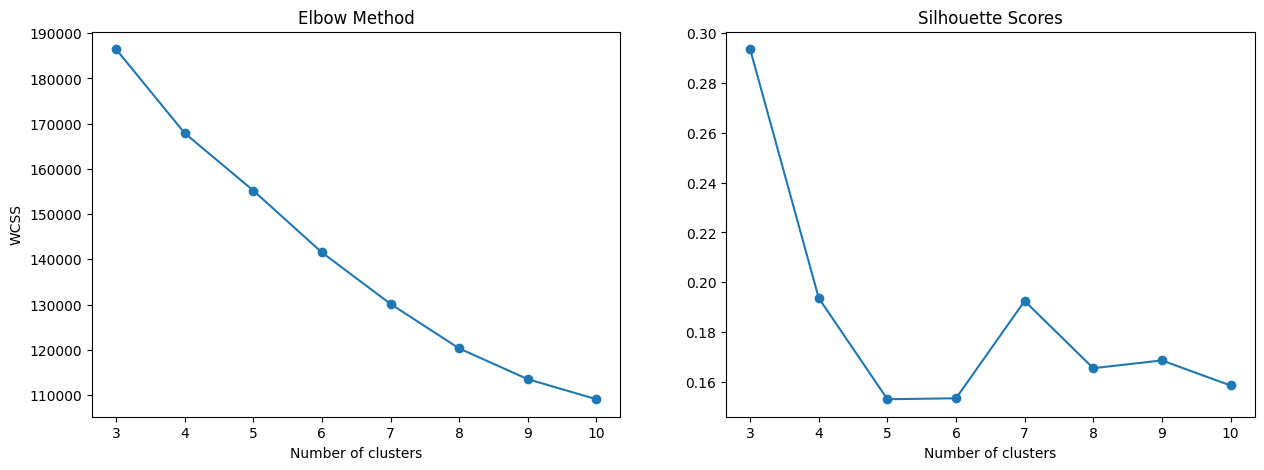

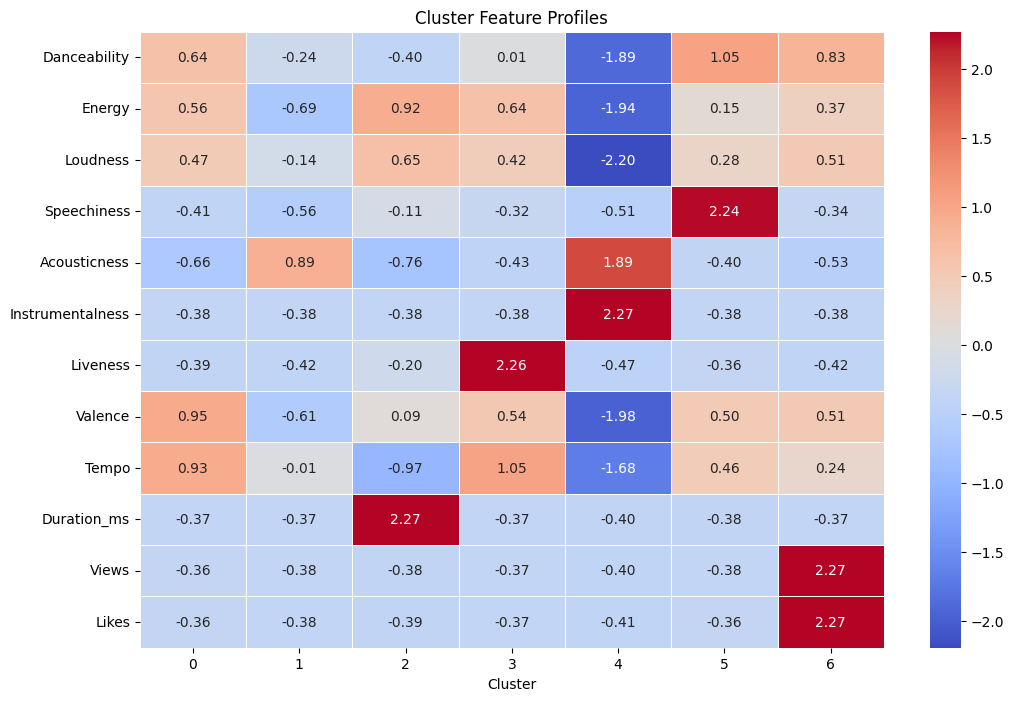

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("Spotify_Youtube.csv")

# Select audio features + engagement metrics
features = [
    "Danceability", "Energy", "Loudness", "Speechiness",
    "Acousticness", "Instrumentalness", "Liveness", "Valence",
    "Tempo", "Duration_ms", "Views", "Likes"
]

df_clean = df[features].fillna(df[features].median())
df = df.loc[df_clean.index]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# Determine optimal clusters using Elbow Method
wcss = []
silhouette_scores = []
cluster_range = range(3, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot cluster evaluation
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(cluster_range, wcss, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('WCSS')

ax[1].plot(cluster_range, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of clusters')
plt.show()

# User-selected optimal k based on plots
optimal_k = 7 

# Final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster characteristics
cluster_profile = df_clean.groupby(df['Cluster']).median()
cluster_profile_normalized = cluster_profile.apply(
    lambda x: (x - x.mean()) / x.std(), axis=0
)

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(
    cluster_profile_normalized.T,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title('Cluster Feature Profiles')
plt.show()

# Genre mapping based on feature analysis (adjust based on heatmap)
genre_mapping = {
    0: 'Dance-Pop / EDM / Club',
    1: 'Acoustic / Indie Folk / Singer-Songwriter',
    2: 'Progressive Rock / Classical / Jazz',
    3: 'Live Performances / Rock Concerts / Unplugged Sessions',
    4: 'Ambient / Chill / Lo-Fi / Meditation',
    5: 'Spoken Word / Podcast / Instrumental Hip-Hop',
    6: 'Trending Pop / Viral Music / Chart-Toppers'
}

df['Predicted_Genre'] = df['Cluster'].map(genre_mapping)

# Save results
df.to_csv("Enhanced_Genre_Clusters.csv", index=False)